In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install keras
!pip install tensorflow
!pip install rasa==1.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.2/447.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 23.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of rasa to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions that require a different python version:

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

In [7]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/koryakinp/fingers")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshiprakash26
Your Kaggle Key: ··········


100%|██████████| 363M/363M [00:17<00:00, 22.2MB/s]


In [8]:
import os
import cv2
import numpy as np


dataset_dir = '/content/fingers/test'


images = []
labels = []


for filename in os.listdir(dataset_dir):

    image = cv2.imread(os.path.join(dataset_dir, filename), cv2.IMREAD_GRAYSCALE)
    
  
    image = cv2.resize(image, (64, 64,))
    
    
    images.append(image)
    
    
    label = int(filename[-6])
    
    
    labels.append(label)


x_test = np.array(images)
y_test = np.array(labels)


In [9]:

dataset_dir = '/content/fingers/train'
images = []
labels = []


for filename in os.listdir(dataset_dir):
    
    image = cv2.imread(os.path.join(dataset_dir, filename), cv2.IMREAD_GRAYSCALE)
    
    
    image = cv2.resize(image, (64, 64,))
    
    
    images.append(image)
    
    
    label = int(filename[-6])
    
  
    labels.append(label)
x_train = np.array(images)
y_train = np.array(labels)

In [10]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [11]:
from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(y_train, num_classes=6)

Y_test = to_categorical(y_test, num_classes=6)

In [12]:
print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (18000, 6)
Y_test shape: (3600, 6)


In [13]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters= 8. , kernel_size=4 , padding='same',strides=1)(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='SAME')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters= 16. , kernel_size=2 , padding='same',strides=1)(P1)
    ## RELU
    A2 =  tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='SAME')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tfl.Dense(units= 6 , activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [14]:
conv_model = convolutional_model((64, 64,1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         136       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train[0:1800,], Y_train[0:1800,]))
train_dataset = train_dataset.batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test[0:300,], Y_test[0:300,]))
test_dataset = test_dataset.batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
29/29 [==============================] - 9s 231ms/step - loss: 31.8852 - accuracy: 0.1711 - val_loss: 8.2127 - val_accuracy: 0.1633
Epoch 2/100
29/29 [==============================] - 4s 136ms/step - loss: 6.8506 - accuracy: 0.1828 - val_loss: 5.7223 - val_accuracy: 0.2100
Epoch 3/100
29/29 [==============================] - 3s 93ms/step - loss: 4.5947 - accuracy: 0.2583 - val_loss: 4.0476 - val_accuracy: 0.2733
Epoch 4/100
29/29 [==============================] - 3s 93ms/step - loss: 3.1026 - accuracy: 0.3583 - val_loss: 2.8004 - val_accuracy: 0.3667
Epoch 5/100
29/29 [==============================] - 4s 152ms/step - loss: 2.2501 - accuracy: 0.4444 - val_loss: 2.1365 - val_accuracy: 0.4533
Epoch 6/100
29/29 [==============================] - 3s 94ms/step - loss: 1.7468 - accuracy: 0.5183 - val_loss: 1.7807 - val_accuracy: 0.5267
Epoch 7/100
29/29 [==============================] - 3s 93ms/step - loss: 1.4601 - accuracy: 0.5744 - val_loss: 1.5556 - val_accuracy: 0.5633
Ep

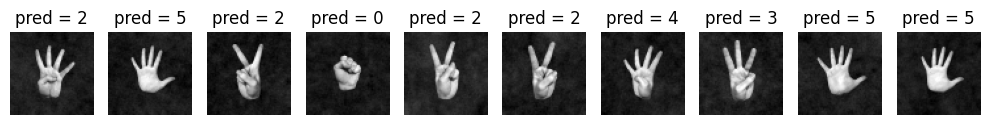

In [16]:
import random
import cv2
from matplotlib import pyplot as plt

numbers = list(range(1, 1001))
random_array = random.sample(numbers, 10)

fig = plt.figure(figsize=(10, 7))

for i, idx in enumerate(random_array):
    img_resized = cv2.resize(x_test[idx], (64, 64))
    y_pred = np.argmax(conv_model.predict(np.expand_dims(x_test[idx], axis=0),verbose=0))
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
    ax.set_title("pred = " + str(y_pred))

plt.tight_layout()
plt.show()